# Setup

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
%cd /content/drive/MyDrive/Colab Notebooks/cs230/womens_edu

/content/drive/MyDrive/Colab Notebooks/cs230/womens_edu


In [46]:
import argparse
import io
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [5]:
!git status

^C


In [6]:
!git config --global user.email "disaaldan@gmail.com"
!git config --global user.name "disaalda"

# Satellite Imagery

## Read In Data

In [58]:
dataset_root_dir = '/content/drive/MyDrive/Colab Notebooks/cs230/womens_edu/data/'
satellite_df = pd.read_csv(os.path.join(dataset_root_dir, 'ZM_ZW_satellite.csv'))
satellite_df = satellite_df.sample(frac=1)

In [61]:
satellite_df.head(100)

,DHSID_EA,year,cc,lat,lon,women_edu,path
4408,TZ-2015-7Z-00000300,2015,TZ,-5.116360,31.391069,3.342857,/content/drive/MyDrive/Colab Notebooks/cs230/w...
881,TG-1998-3#-00000537,1998,TG,10.591138,0.491240,0.000000,/content/drive/MyDrive/Colab Notebooks/cs230/w...
9372,ZW-2005-5#-00000167,2005,ZW,-16.811923,29.103885,5.000000,/content/drive/MyDrive/Colab Notebooks/cs230/w...
9751,ZW-2010-6#-00000033,2010,ZW,-20.158878,28.610676,11.625000,/content/drive/MyDrive/Colab Notebooks/cs230/w...
7629,ZM-2007-5#-00000098,2007,ZM,-10.945129,29.706455,3.357143,/content/drive/MyDrive/Colab Notebooks/cs230/w...
...,...,...,...,...,...,...,...
5396,UG-2000-4#-00003605,2000,UG,-1.007595,30.007959,6.333333,/content/drive/MyDrive/Colab Notebooks/cs230/w...
4502,TZ-2015-7Z-00000394,2015,TZ,-3.283265,33.028655,4.230769,/content/drive/MyDrive/Colab Notebooks/cs230/w...
2748,TZ-2007-5#-00000141,2007,TZ,-4.302358,30.139762,5.926829,/content/drive/MyDrive/Colab Notebooks/cs230/w...
4627,TZ-2015-7Z-00000519,2015,TZ,-3.381252,32.272054,5.666667,/content/drive/MyDrive/Colab Notebooks/cs230/w...


In [39]:
MEANS = {
    'BLUE':    0.06547681,
    'GREEN':   0.09543012,
    'RED':     0.10692262,
    'SWIR1':   0.22902039,
    'SWIR2':   0.15596166,
    'TEMP1': 298.51077,
    'NIR':     0.2542566,
    'DMSP':   41.69006032536221,
    'VIIRS':   3.443405293536357
    # 'NIGHTLIGHTS': 20.753946  # nightlights overall
}

STD_DEVS = {
    'BLUE':    0.031534348,
    'GREEN':   0.04290699,
    'RED':     0.06305032,
    'SWIR1':   0.09461683,
    'SWIR2':   0.08886013,
    'TEMP1':   8.608657,
    'NIR':     0.06909249,
    'DMSP':  109.7289863161683,
    'VIIRS':  10.97284745670896
    # 'NIGHTLIGHTS': 76.66724  # nightlights overall
}

In [64]:
for i in satellite_df['path'][:100]:
  images = np.load(i)['x']
  #print(images.shape)
  #images.shape
  images = images[:3,:,:]
  images = images.transpose((1,2,0))
  #images = (images - images.min()) / (images.max() - images.min())
  images = images[::-1,:,:]
  print(images.min(), images.max(), images[0].mean(), images[1].mean(), images[2].mean())
  plt.ion()
  plt.figure()
  plt.imshow(images)

Output hidden; open in https://colab.research.google.com to view.

In [43]:
import torch
dfile = "data/dhs_TD_ZW/TZ-2007-5#/TZ-2007-5#-00000475.npz"
image = np.load(dfile)['x']
img = torch.from_numpy(image).float()
img = img[:3]
img.shape, img.max(), img.min()

(torch.Size([3, 255, 255]), tensor(0.2137), tensor(0.0344))

(8, 255, 255)
0.0344 0.2137


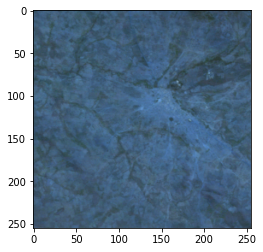

In [24]:
dfile = "data/dhs_TD_ZW/TZ-2007-5#/TZ-2007-5#-00000475.npz"
images = np.load(dfile)['x']
print(images.shape)
images.shape
images = images[:3,:,:]
images = images.transpose((1,2,0))
images = images[::-1,:,:]
print(images.min(), images.max())
plt.imshow(images*4)
# for i in range(len(images)):
#   plt.ion()
#   plt.figure()
#   plt.imshow(images[i])

In [ ]:
images.shape

(3, 255, 255)

In [ ]:
dfile = "data/dhs_TD_ZW/ZM-2007-5#/ZM-2007-5#-00000320.npz"
images = np.load(dfile)['x']
images.shape

(8, 255, 255)

## Create a Dataset with Labels and Image Path

In [82]:
dataset_root_dir = '/content/drive/MyDrive/Colab Notebooks/cs230/womens_edu/data/'

In [83]:
df = pd.read_csv(os.path.join(dataset_root_dir, 'dhs_final_labels.csv'))
len(df)

117644

In [84]:
df['survey'] = df['DHSID_EA'].str[:10]
df['cc'] = df['DHSID_EA'].str[:2]
df['path'] = dataset_root_dir + '/dhs_TD_ZW/' + df['survey'] + '/' + df['DHSID_EA'] + '.npz'

In [85]:
df.head()

,DHSID_EA,cname,year,lat,lon,n_asset,asset_index,n_water,water_index,n_sanitation,...,women_bmi,n_women_edu,n_women_bmi,cluster_id,adm1fips,adm1dhs,urban,survey,cc,path
0,AL-2008-5#-00000001,AL,2008,40.822652,19.838321,18.0,2.430596,18.0,3.444444,18.0,...,24.365000,18.0,18.0,1,NaN,9999,R,AL-2008-5#,AL,/content/drive/MyDrive/Colab Notebooks/cs230/w...
1,AL-2008-5#-00000002,AL,2008,40.696846,20.007555,20.0,2.867678,20.0,4.700000,20.0,...,23.104000,20.0,20.0,2,NaN,9999,R,AL-2008-5#,AL,/content/drive/MyDrive/Colab Notebooks/cs230/w...
2,AL-2008-5#-00000003,AL,2008,40.750037,19.974262,18.0,2.909049,18.0,4.500000,18.0,...,22.387778,18.0,18.0,3,NaN,9999,R,AL-2008-5#,AL,/content/drive/MyDrive/Colab Notebooks/cs230/w...
3,AL-2008-5#-00000004,AL,2008,40.798931,19.863338,19.0,2.881122,19.0,4.947368,19.0,...,27.084500,21.0,20.0,4,NaN,9999,R,AL-2008-5#,AL,/content/drive/MyDrive/Colab Notebooks/cs230/w...
4,AL-2008-5#-00000005,AL,2008,40.746123,19.843885,19.0,2.546830,19.0,4.684211,19.0,...,24.523125,16.0,16.0,5,NaN,9999,R,AL-2008-5#,AL,/content/drive/MyDrive/Colab Notebooks/cs230/w...


In [86]:
# randomly sample images from the downloaded images 
TD_ZW_list = ['ZM', 'ZW', 'UG', 'TZ', 'TJ', 'TG', 'TD'] 
countries_list = TD_ZW_list
df_sub = df[ df['cc'].isin(countries_list) ]
len(df_sub)

10514

In [87]:
cc_count = df_sub.groupby(['cc'])['cc'].count()
cc_count

cc
TD     624
TG     762
TJ     708
TZ    3059
UG    2379
ZM    1573
ZW    1409
Name: cc, dtype: int64

In [88]:
df_sub.set_index('DHSID_EA', verify_integrity=True, inplace=True)

In [89]:
label_cols = ['year', 'cc', 'lat', 'lon', 'women_edu', 'path']
df_sub = df_sub[label_cols]
df_sub.head()

,year,cc,lat,lon,women_edu,path
DHSID_EA,,,,,,
TD-2014-7#-00000001,2014,TD,9.453506,18.944837,4.320000,/content/drive/MyDrive/Colab Notebooks/cs230/w...
TD-2014-7#-00000002,2014,TD,13.466001,22.196232,1.840000,/content/drive/MyDrive/Colab Notebooks/cs230/w...
TD-2014-7#-00000003,2014,TD,15.749017,18.285138,1.440000,/content/drive/MyDrive/Colab Notebooks/cs230/w...
TD-2014-7#-00000004,2014,TD,12.135490,15.206105,0.258065,/content/drive/MyDrive/Colab Notebooks/cs230/w...
TD-2014-7#-00000005,2014,TD,9.264128,16.400491,3.040000,/content/drive/MyDrive/Colab Notebooks/cs230/w...


In [90]:
df_sub = df_sub.dropna() 
len(df_sub)

10510

In [92]:
df_sub.to_csv(os.path.join(dataset_root_dir, 'ZM_ZW_satellite.csv'))

## EDA 

In [93]:
df_sub.describe()

,year,lat,lon,women_edu
count,10510.000000,10510.000000,10510.000000,10510.000000
mean,2011.247669,-2.096166,31.856391,6.284550
std,5.459061,14.063659,13.692137,2.834168
min,1998.000000,-22.243418,0.011434,0.000000
25%,2007.000000,-11.297502,28.767239,4.470588
50%,2013.000000,-3.775860,31.932900,6.270979
75%,2015.000000,2.048004,34.642927,8.285714
max,2018.000000,40.897501,74.646337,14.714286


(array([ 651.,  616., 1288., 2106., 2137., 1641., 1190.,  686.,  164.,
          31.]),
 array([ 0.        ,  1.47142857,  2.94285714,  4.41428571,  5.88571429,
         7.35714286,  8.82857143, 10.3       , 11.77142857, 13.24285714,
        14.71428571]),
 <a list of 10 Patch objects>)

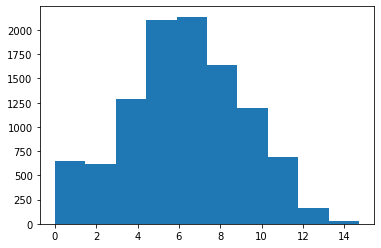

In [94]:
plt.hist(df_sub['women_edu'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e4570ba90>,
      dtype=object)

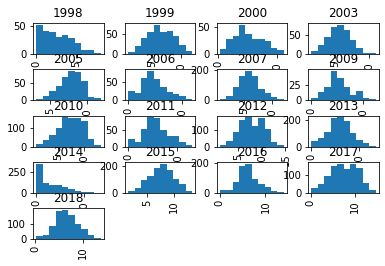

In [95]:
df_sub['women_edu'].hist(by=df_sub['year'])

In [96]:
cc_avg = df_sub.groupby(['cc'])['women_edu'].mean()
cc_avg

cc
TD     1.881005
TG     3.915667
TJ    10.480954
TZ     6.051394
UG     5.672600
ZM     6.620229
ZW     8.569858
Name: women_edu, dtype: float64

In [97]:
year_count = df_sub.groupby(['year', 'cc'])['year'].count()
year_count

year  cc
1998  TG    260
1999  TZ    173
      ZW    220
2000  UG    264
2003  TZ    345
2005  ZW    396
2006  UG    336
2007  TZ    466
      ZM    319
2009  UG    170
2010  TZ    458
      ZW    393
2011  UG    399
2012  TJ    343
      TZ    573
2013  TG    330
      ZM    718
2014  TD    624
      UG    208
2015  TZ    607
      ZW    400
2016  UG    685
2017  TG    171
      TJ    365
      TZ    436
2018  UG    316
      ZM    535
Name: year, dtype: int64

In [98]:
year_count = df_sub.groupby(['year'])['year'].count().cumsum()
year_count

year
1998      260
1999      653
2000      917
2003     1262
2005     1658
2006     1994
2007     2779
2009     2949
2010     3800
2011     4199
2012     5115
2013     6163
2014     6995
2015     8002
2016     8687
2017     9659
2018    10510
Name: year, dtype: int64

# Street-Level Imagery

In [ ]:
street_df =  pd.read_csv(os.path.join(dataset_root_dir, 'KY.csv'))

In [ ]:
street_df['img_path'] = dataset_root_dir + street_df['img_path']
street_df.head()

,DHSID_EA,country_code,year,img_captured_at,img_lon,img_lat,img_id,img_path
0,KY-2012-6#-00000210,KY,2012,1431267666548,74.460870,43.051974,2683402805284887,/content/drive/MyDrive/Colab Notebooks/cs230/w...
1,KY-2012-6#-00000210,KY,2012,1431267739832,74.470439,43.053836,859209238017030,/content/drive/MyDrive/Colab Notebooks/cs230/w...
2,KY-2012-6#-00000210,KY,2012,1431267636142,74.452695,43.050860,518307519178827,/content/drive/MyDrive/Colab Notebooks/cs230/w...
3,KY-2012-6#-00000210,KY,2012,1431267747422,74.470359,43.054024,1370367363330031,/content/drive/MyDrive/Colab Notebooks/cs230/w...
4,KY-2012-6#-00000210,KY,2012,1431267686722,74.465621,43.052592,473814717185741,/content/drive/MyDrive/Colab Notebooks/cs230/w...


In [ ]:
street_df['img_id'] = street_df['img_id'].astype(str)

In [ ]:
street_df['img_path_resized'] =  os.path.join(dataset_root_dir, 'KY') + '/' + street_df['DHSID_EA'] + '/' + street_df['img_id'] + ' resized.jpg'

In [ ]:
street_df.head()

,DHSID_EA,country_code,year,img_captured_at,img_lon,img_lat,img_id,img_path,img_path_resized
0,KY-2012-6#-00000210,KY,2012,1431267666548,74.460870,43.051974,2683402805284887,/content/drive/MyDrive/Colab Notebooks/cs230/w...,/content/drive/MyDrive/Colab Notebooks/cs230/w...
1,KY-2012-6#-00000210,KY,2012,1431267739832,74.470439,43.053836,859209238017030,/content/drive/MyDrive/Colab Notebooks/cs230/w...,/content/drive/MyDrive/Colab Notebooks/cs230/w...
2,KY-2012-6#-00000210,KY,2012,1431267636142,74.452695,43.050860,518307519178827,/content/drive/MyDrive/Colab Notebooks/cs230/w...,/content/drive/MyDrive/Colab Notebooks/cs230/w...
3,KY-2012-6#-00000210,KY,2012,1431267747422,74.470359,43.054024,1370367363330031,/content/drive/MyDrive/Colab Notebooks/cs230/w...,/content/drive/MyDrive/Colab Notebooks/cs230/w...
4,KY-2012-6#-00000210,KY,2012,1431267686722,74.465621,43.052592,473814717185741,/content/drive/MyDrive/Colab Notebooks/cs230/w...,/content/drive/MyDrive/Colab Notebooks/cs230/w...


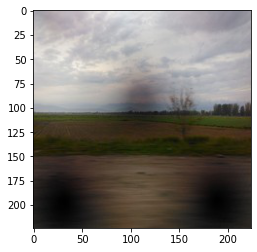

In [ ]:
image = plt.imread(street_df['img_path_resized'][1000])
plt.imshow(image)

In [ ]:
image.shape # permute this later on 

(224, 224, 3)

In [ ]:
year_count = street_df.groupby(['year'])['year'].count()
year_count

year
2012    1105
Name: year, dtype: int64

In [ ]:
# left join labels to street metadata df
street_labels_df = street_df.merge(df[['DHSID_EA','women_edu']], on='DHSID_EA', how='left')
street_labels_df.head(10)

,DHSID_EA,country_code,year,img_captured_at,img_lon,img_lat,img_id,img_path,img_path_resized,women_edu
0,KY-2012-6#-00000210,KY,2012,1431267666548,74.460870,43.051974,2683402805284887,/content/drive/MyDrive/Colab Notebooks/cs230/w...,/content/drive/MyDrive/Colab Notebooks/cs230/w...,9.909091
1,KY-2012-6#-00000210,KY,2012,1431267739832,74.470439,43.053836,859209238017030,/content/drive/MyDrive/Colab Notebooks/cs230/w...,/content/drive/MyDrive/Colab Notebooks/cs230/w...,9.909091
2,KY-2012-6#-00000210,KY,2012,1431267636142,74.452695,43.050860,518307519178827,/content/drive/MyDrive/Colab Notebooks/cs230/w...,/content/drive/MyDrive/Colab Notebooks/cs230/w...,9.909091
3,KY-2012-6#-00000210,KY,2012,1431267747422,74.470359,43.054024,1370367363330031,/content/drive/MyDrive/Colab Notebooks/cs230/w...,/content/drive/MyDrive/Colab Notebooks/cs230/w...,9.909091
4,KY-2012-6#-00000210,KY,2012,1431267686722,74.465621,43.052592,473814717185741,/content/drive/MyDrive/Colab Notebooks/cs230/w...,/content/drive/MyDrive/Colab Notebooks/cs230/w...,9.909091
5,KY-2012-6#-00000210,KY,2012,1431267752512,74.470076,43.054048,137005738405630,/content/drive/MyDrive/Colab Notebooks/cs230/w...,/content/drive/MyDrive/Colab Notebooks/cs230/w...,9.909091
6,KY-2012-6#-00000210,KY,2012,1431267737290,74.470452,43.053807,1195808654199791,/content/drive/MyDrive/Colab Notebooks/cs230/w...,/content/drive/MyDrive/Colab Notebooks/cs230/w...,9.909091
7,KY-2012-6#-00000210,KY,2012,1431267653977,74.457561,43.051551,938132660062541,/content/drive/MyDrive/Colab Notebooks/cs230/w...,/content/drive/MyDrive/Colab Notebooks/cs230/w...,9.909091
8,KY-2012-6#-00000210,KY,2012,1431267603401,74.443755,43.049638,1169125583519047,/content/drive/MyDrive/Colab Notebooks/cs230/w...,/content/drive/MyDrive/Colab Notebooks/cs230/w...,9.909091
9,KY-2012-6#-00000210,KY,2012,1431267726866,74.470536,43.053363,462516511526488,/content/drive/MyDrive/Colab Notebooks/cs230/w...,/content/drive/MyDrive/Colab Notebooks/cs230/w...,9.909091


In [ ]:
street_labels_df = street_labels_df.rename(columns={'img_path_resized':'path'})
street_labels_df = street_labels_df[['DHSID_EA', 'country_code', 'year', 'path', 'women_edu']]

In [ ]:
street_labels_df.to_csv(dataset_root_dir + 'KY_cleaned.csv')

In [ ]:
street_labels_df.head()

,DHSID_EA,country_code,year,path,women_edu
0,KY-2012-6#-00000210,KY,2012,/content/drive/MyDrive/Colab Notebooks/cs230/w...,9.909091
1,KY-2012-6#-00000210,KY,2012,/content/drive/MyDrive/Colab Notebooks/cs230/w...,9.909091
2,KY-2012-6#-00000210,KY,2012,/content/drive/MyDrive/Colab Notebooks/cs230/w...,9.909091
3,KY-2012-6#-00000210,KY,2012,/content/drive/MyDrive/Colab Notebooks/cs230/w...,9.909091
4,KY-2012-6#-00000210,KY,2012,/content/drive/MyDrive/Colab Notebooks/cs230/w...,9.909091


## Resize Images to 224x224 

In [ ]:
from PIL import Image
import os, sys

path = os.path.join(dataset_root_dir, "TJ")
dirs = os.listdir( path )
print(path)
print(dirs)

/content/drive/MyDrive/Colab Notebooks/cs230/womens_edu/data/TJ
['TJ-2017-7#-00000154', 'TJ-2017-7#-00000350', 'TJ-2017-7#-00000196', 'TJ-2017-7#-00000191', 'TJ-2017-7#-00000357', 'TJ-2017-7#-00000303', 'TJ-2017-7#-00000131', 'TJ-2017-7#-00000136', 'TJ-2017-7#-00000304', 'TJ-2017-7#-00000100', 'TJ-2017-7#-00000332', 'TJ-2017-7#-00000335', 'TJ-2017-7#-00000138', 'TJ-2017-7#-00000356', 'TJ-2017-7#-00000164', 'TJ-2017-7#-00000190', 'TJ-2017-7#-00000197', 'TJ-2017-7#-00000163', 'TJ-2017-7#-00000358', 'TJ-2017-7#-00000155', 'TJ-2017-7#-00000360', 'TJ-2017-7#-00000152', 'TJ-2017-7#-00000106', 'TJ-2017-7#-00000139', 'TJ-2017-7#-00000333', 'TJ-2017-7#-00000101', 'TJ-2017-7#-00000305', 'TJ-2017-7#-00000137', 'TJ-2017-7#-00000130', 'TJ-2017-7#-00000302', 'TJ-2017-7#-00000354', 'TJ-2017-7#-00000330', 'TJ-2017-7#-00000105', 'TJ-2017-7#-00000308', 'TJ-2017-7#-00000301', 'TJ-2017-7#-00000133', 'TJ-2017-7#-00000134', 'TJ-2017-7#-00000306', 'TJ-2017-7#-00000339', 'TJ-2017-7#-00000194', 'TJ-2017-7#-000

In [ ]:
def resize():
    for d in dirs:
      folder = os.listdir( os.path.join(path, d)) 
      for item in folder:
        #print(item)
        file_path = os.path.join(path, d, item)
        folder_path = os.path.join(path, d)
        if os.path.isfile(file_path):
          #print()
          #print(file_path)
          im = Image.open(file_path)
          f, e = os.path.splitext(file_path)
          imResize = im.resize((224,224), Image.ANTIALIAS)
          #print( f + '_resized.jpg')
          imResize.save( f+ '_resized.jpg', 'JPEG', quality=90)

resize()

KeyboardInterrupt: ignored

# Create Clusters

In [ ]:
df.head()

,DHSID_EA,cname,year,lat,lon,n_asset,asset_index,n_water,water_index,n_sanitation,...,women_bmi,n_women_edu,n_women_bmi,cluster_id,adm1fips,adm1dhs,urban,survey,cc,path
0,AL-2008-5#-00000001,AL,2008,40.822652,19.838321,18.0,2.430596,18.0,3.444444,18.0,...,24.365000,18.0,18.0,1,NaN,9999,R,AL-2008-5#,AL,/content/drive/MyDrive/Colab Notebooks/cs230/w...
1,AL-2008-5#-00000002,AL,2008,40.696846,20.007555,20.0,2.867678,20.0,4.700000,20.0,...,23.104000,20.0,20.0,2,NaN,9999,R,AL-2008-5#,AL,/content/drive/MyDrive/Colab Notebooks/cs230/w...
2,AL-2008-5#-00000003,AL,2008,40.750037,19.974262,18.0,2.909049,18.0,4.500000,18.0,...,22.387778,18.0,18.0,3,NaN,9999,R,AL-2008-5#,AL,/content/drive/MyDrive/Colab Notebooks/cs230/w...
3,AL-2008-5#-00000004,AL,2008,40.798931,19.863338,19.0,2.881122,19.0,4.947368,19.0,...,27.084500,21.0,20.0,4,NaN,9999,R,AL-2008-5#,AL,/content/drive/MyDrive/Colab Notebooks/cs230/w...
4,AL-2008-5#-00000005,AL,2008,40.746123,19.843885,19.0,2.546830,19.0,4.684211,19.0,...,24.523125,16.0,16.0,5,NaN,9999,R,AL-2008-5#,AL,/content/drive/MyDrive/Colab Notebooks/cs230/w...


In [ ]:
print(len(df[ df['cname'] == 'TJ' ]))
print(len(df[ df['cname'] == 'TJ' ]['cluster_id'].unique()))

708
366
